# Multiple Linear Regression
---

## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ml_utils import *
import sys

In [2]:
#Display settings
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [3]:
#Load the dataset
df = pd.read_csv("Housing.csv")

In [4]:
#Visual overview of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Overview

**Shape of the Dataset:**

(545, 13)
-----------------




**Number of rows and columns in the Dataset:**

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
-----------------




**Basic information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
-----------------




**Percentage null values in the Dataset:**

furnishingstatus    0.0
prefarea            0.0
parking             0.0
airconditioning     0.0
hotwaterheating     0.0
basement            0.0
guestroom           0.0
mainroad            0.0
stories             0.0
bathrooms           0.0
bedrooms            0.0
area                0.0
price               0.0
dtype: float64
-----------------




**Total number of duplicated rows in the Dataset:**

0
-----------------




**Categorical columns in the Dataset:**

['guestroom', 'airconditioning', 'hotwaterheating', 'furnishingstatus', 'mainroad', 'prefarea', 'basement']
-----------------




**Unique values across categorical columns in the Dataset:**

Unique values in the column:  guestroom
{'no': 448, 'yes': 97}
-----------------


Unique values in the column:  airconditioning
{'no': 373, 'yes': 172}
-----------------


Unique values in the column:  hotwaterheating
{'no': 520, 'yes': 25}
-----------------


Unique values in the column:  furnishingstatus
{'semi-furnished': 227, 'unfurnished': 178, 'furnished': 140}
-----------------


Unique values in the column:  mainroad
{'yes': 468, 'no': 77}
-----------------


Unique values in the column:  prefarea
{'no': 417, 'yes': 128}
-----------------


Unique values in the column:  basement
{'no': 354, 'yes': 191}
-----------------


-----------------




**Visual representation of the Dataset:**

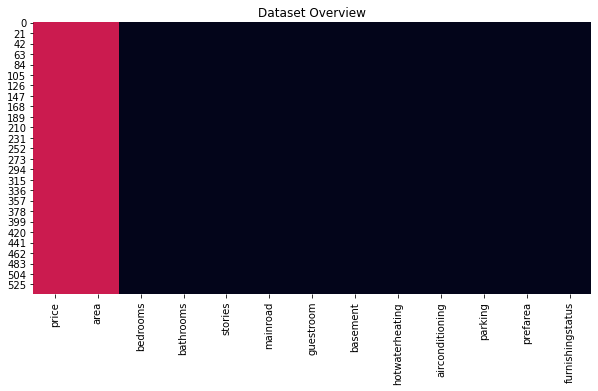

 Categorical   Numerical   NaN 


In [5]:
#Get an overview of the Dataset
df_overview(df, max_cat=20, figsize=(10,5))

### Data Pre-Processing

**Binary mapping for categorical columns**

In [6]:
#Add Binary mapping to categorical columns
col_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
val_list = ["no", "yes"]
df = add_mapping(df, col_list, val_list)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


**Dummy variables for categorical data with > 2 entries**

In [8]:
#Get dummy variables
df = add_dummies(df, x="furnishingstatus", dropx=True)

  furnishingstatus  furnishingstatus_semi-furnished  \
0        furnished                                0   
1        furnished                                0   
2   semi-furnished                                1   
3        furnished                                0   
4        furnished                                0   

   furnishingstatus_unfurnished  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  


In [9]:
#Visualize the dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


**Split the data into train and test data**

In [10]:
#Split the train and test data
df_train, df_test = df_partitioning(df, y="price", test_size=0.3, shuffle=False)

X_train shape: (381, 13) | X_test shape: (164, 13)
y_train mean: 5543713.75 | y_test mean: 2961661.59
14 features: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


**Scale the numerical data**

In [11]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train = scaling(df, num_vars)

In [12]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


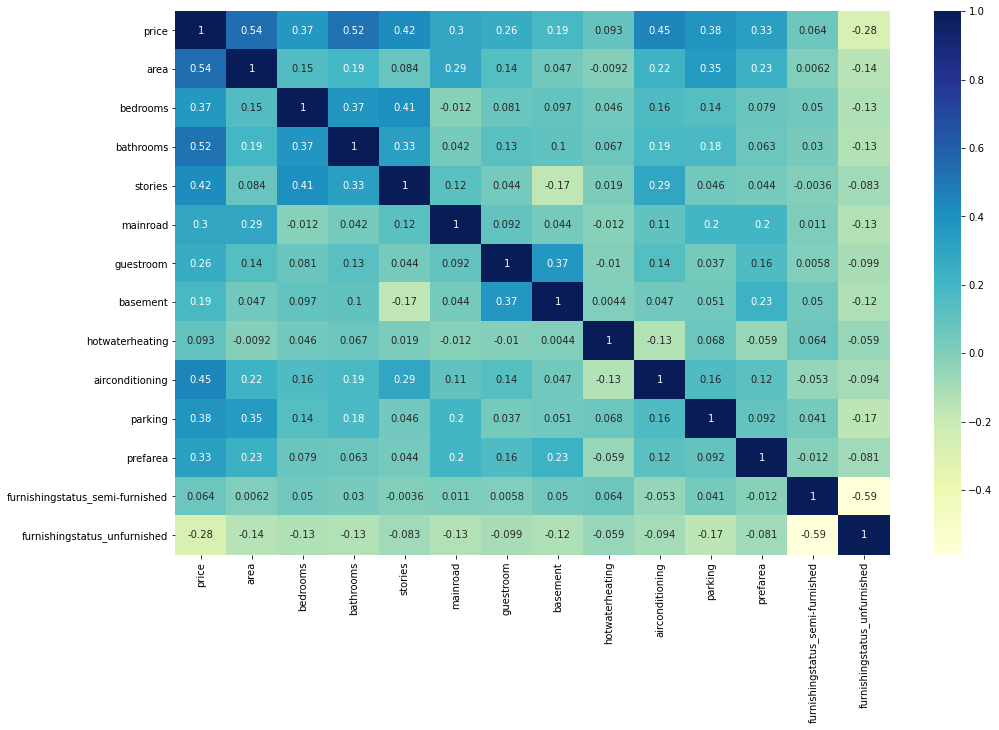

In [13]:
# Let's check the correlation coefficients to see which variables are highly correlated
corr_matrix(df_train)

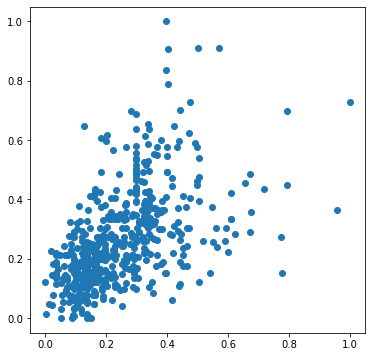

In [15]:
#Visualize the scatter plot
scatter_plot(df_train, ["area", "price"])

### Dividing into X and Y sets for the model building

In [16]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [17]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [18]:
# Check the parameters obtained

lr.params

const                              0.021550
area                               0.307552
bedrooms                           0.049692
bathrooms                          0.256537
stories                            0.117103
mainroad                           0.036474
guestroom                          0.026020
basement                           0.030312
hotwaterheating                    0.074065
airconditioning                    0.074888
parking                            0.071976
prefarea                           0.056411
furnishingstatus_semi-furnished   -0.004013
furnishingstatus_unfurnished      -0.035605
dtype: float64

In [19]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 23 Nov 2021   Prob (F-statistic):          9.07e-123
Time:                        01:07:46   Log-Likelihood:                 531.39
No. Observations:                 545   AIC:                            -1035.
Df Residuals:                     531   BIC:                            -974.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     